#Ocorrências na Aviação Brasileira - Análise de exploração de dados


A seguinte análise tem como objetivo extrair dados e entender o comportamento de ocorrências na aviação brasileira. A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA no anos de 2012 a 2021 que ocorreram em solo brasileiro.

  <p>codigo_ocorrencia
  <p>codigo_ocorrencia1
  <p>codigo_ocorrencia2
  <p>codigo_ocorrencia3	
  <p>codigo_ocorrencia4	
  <p>ocorrencia_classificacao	
  <p>ocorrencia_latitude	
  <p>ocorrencia_longitude	
  <p>ocorrencia_cidade	ocorrencia_uf	
  <p>ocorrencia_dia	
  <p>ocorrencia_hora	
  <p>investigacao_aeronave_liberada	
  <p>investigacao_status	
 <p> divulgacao_relatorio_numero	
  <p>divulgacao_relatorio_publicado	
  <p>divulgacao_dia_publicacao	
  <p>total_recomendacoes	
  <p>total_aeronaves_envolvidas	
  <p>ocorrencia_saida_pista

In [1]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

In [104]:
df = pd.read_csv('ocorrencia.csv', sep=';', date_parser = True)

In [19]:
df.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista'],
      dtype='object')

In [105]:
df.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4'],axis=1, inplace=True)

In [111]:
df1.isnull().sum()/df.shape[0]*100

codigo_ocorrencia                 0.0
ocorrencia_classificacao          0.0
ocorrencia_latitude               0.0
ocorrencia_longitude              0.0
ocorrencia_cidade                 0.0
ocorrencia_uf                     0.0
ocorrencia_pais                   0.0
ocorrencia_aerodromo              0.0
ocorrencia_dia                    0.0
ocorrencia_hora                   0.0
investigacao_aeronave_liberada    0.0
investigacao_status               0.0
divulgacao_relatorio_numero       0.0
divulgacao_relatorio_publicado    0.0
total_recomendacoes               0.0
total_aeronaves_envolvidas        0.0
ocorrencia_saida_pista            0.0
dtype: float64

In [107]:
df.drop(['divulgacao_dia_publicacao'],axis=1, inplace=True)

In [110]:
df1 = df.dropna(axis=0)

In [41]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
codigo_ocorrencia,3644.0,67572.067783,13090.087103,45331.0,53203.75,77396.5,79277.25,80468.0
total_recomendacoes,3644.0,0.297750,0.905945,0.0,0.00,0.0,0.00,11.0
total_aeronaves_envolvidas,3644.0,1.013172,0.116410,1.0,1.00,1.0,1.00,3.0


In [132]:
df_aux= df1[df1['ocorrencia_longitude']!='***']
df_aux= df_aux[df_aux['ocorrencia_longitude']!='****']
df_aux= df_aux[df_aux['ocorrencia_longitude']!='*****']
df_aux= df_aux[df_aux['ocorrencia_longitude']!='****_****']

In [133]:
df_aux.groupby('ocorrencia_longitude').ocorrencia_longitude.sum()[:20]

ocorrencia_longitude
- 40.68583                                                - 40.68583
-0.0                                                            -0.0
-18.2250                                                    -18.2250
-18.83916                                                  -18.83916
-18.973889                                                -18.973889
-20.4230                                                    -20.4230
-21.24055                                                  -21.24055
-22.92166666666                                      -22.92166666666
-23.18166666666                                      -23.18166666666
-32.9919444444                                        -32.9919444444
-34.8425                                            -34.8425-34.8425
-34.8913888889                          -34.8913888889-34.8913888889
-34.89138889                                            -34.89138889
-34.9005555556                                        -34.9005555556
-34.91277    

In [134]:
df_aux= df_aux[df_aux['ocorrencia_latitude']!='***']
df_aux= df_aux[df_aux['ocorrencia_latitude']!='*****']


In [135]:
df_aux.groupby('ocorrencia_latitude').ocorrencia_latitude.sum()

ocorrencia_latitude
- 22.75944                - 22.75944
-0,889722                  -0,889722
-0.0                            -0.0
-0.0075                      -0.0075
-0.050833333333      -0.050833333333
                          ...       
\t-33.26888889\t    \t-33.26888889\t
\t-33.38472222\t    \t-33.38472222\t
\t-33.43666667\t    \t-33.43666667\t
\t-4.074166667\t    \t-4.074166667\t
\t-49.23388889\t    \t-49.23388889\t
Name: ocorrencia_latitude, Length: 2257, dtype: object

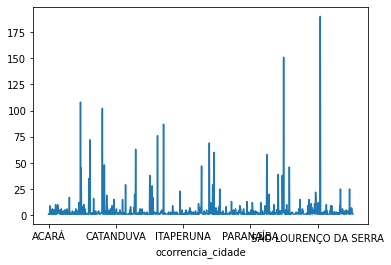

In [114]:
df1.groupby(['ocorrencia_cidade']).total_aeronaves_envolvidas.sum().plot()

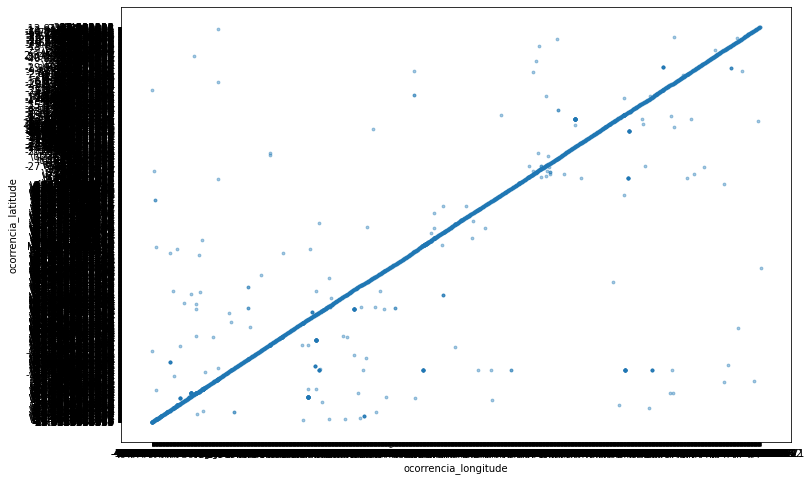

In [136]:
df_aux.plot(kind="scatter", x='ocorrencia_longitude', y='ocorrencia_latitude', alpha=0.4, s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));